In [1]:
import reg_total_0609 as reg
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

# 데이터 로드
df = pd.read_csv("regression_df.csv")
df.shape

(34208, 67)

# 0. Scaling
- Standard 
- Minmax
- Robust

회귀분석 전 스케일링을 적용
- 변수간 스케일 불일치 해소
- 이상치 영향 완화
- 수치 최적화 개선
- 변수 중요도 해석용이



<!-- '''from sklearn.preprocessing import StandardScaler

왜도첨도 기준으로 해봤다~
temp_col = ['building_nonresidential_p',
 'corp_to_pop',
 'building_others_p',
 'medical_per_ppltn',
 'subway_dist',
 'cultural_venue_dist',
 'hhd_collective_p',
 'convenience_per_ppltn',
 'culture_per_ppltn',
 'hhd_private_p',
 'green_per_area',
 'ppltn_foreign_domestic_ratio',
 'convenience_store_dist',
 'hospital_dist',
 'park_per_area',
 'building_yeonlip_p',
 'grocery_per_ppltn',
 'tenure_free_ratio',
 'supermarket_dist',
 'gender_ratio',
 'gym_per_ppltn',
 'building_dandok_p',
 'shopping_per_ppltn',
 'public_institution_dist',
 'size_m2',
 'restaurant_per_ppltn',
 'ppltn_adult_p',
 'ppltn_total']

temp_X_train = X_train.copy()
temp_X_test = X_test.copy()
temp2_X_train = X_train.copy()
temp2_X_test = X_test.copy()

scaler = StandardScaler()
temp2_X_train_scaled = scaler.fit_transform(temp2_X_train)
temp2_X_test_scaled = scaler.fit_transform(temp2_X_test)
X_train_scaled = pd.DataFrame(temp2_X_train_scaled)
X_test_scaled = pd.DataFrame(temp2_X_test_scaled)


log_train= np.log(temp_X_train[temp_col])
log_test= np.log(temp_X_test[temp_col])
X_train_scaled[temp_col] = log_train
X_test_scaled[temp_col] = log_test


temp_X_train = temp_X_train[np.isfinite(X_train_scaled)]
temp_X_test = temp_X_test[np.isfinite(X_test_scaled)]''' -->

- 데이터의 분포를 확인하기 위해 이상치가 있는 데이터들의 왜도, 첨도 확인 
  - 지하철 역까지의 거리, 문화시설까지의 거리, 1인당 녹지면적, 1인당 공원면적, 성비, 인구 수 등의 컬럼에서 확인
- 확인된 각 데이터들의 분포를 바탕으로 변수 별 특징을 고려하여 스케일링과 변환을 적용해 봄
  - Standard scaling: 정규분포에 근사한 변수: 
  - Robust scaling: 이상치가 많은 데이터에 적용해 봄. 그러나 우리가 수집한 데이터는 이상치가 오히려 매물의 특성을 나타내기 때문에 이상치에 영향을 덜 받는 robust는 적합하지 않았음
  - Minmax scaling: 우리의 데이터에는 이상치(outliers)가 존재하고, 분포가 불균형하기 때문에 minmax scaling은 적합하지 않았음


In [3]:
# 선형모델에 standard scaling 적용한 결과
standard_result = reg.get_linear_result_df("original","standard")

               Model  Train RMSE  Train R^2  Test RMSE  Test R^2
0  Linear Regression   25.397590   0.679459  24.467549  0.686063
1   Ridge Regression   25.394750   0.679531  24.465443  0.686117
2   Lasso Regression   25.499299   0.676886  24.544178  0.684094
3         ElasticNet   25.398984   0.679424  24.476615  0.685831


In [4]:
# 선형모델에 minmax scaling 적용한 결과
minmax_result = reg.get_linear_result_df("original","minmax")

               Model  Train RMSE  Train R^2  Test RMSE  Test R^2
0  Linear Regression   25.394933   0.679526  24.465357  0.686120
1   Ridge Regression   25.395030   0.679524  24.467454  0.686066
2   Lasso Regression   26.086045   0.661845  25.136449  0.668664
3         ElasticNet   25.399754   0.679404  24.475086  0.685870


In [5]:
# 선형모델에 Robust scaling 적용한 결과
robust_result = reg.get_linear_result_df('original','robust')

               Model  Train RMSE  Train R^2  Test RMSE  Test R^2
0  Linear Regression   25.394762   0.679530  24.465433  0.686118
1   Ridge Regression   25.394756   0.679530  24.465647  0.686112
2   Lasso Regression   25.522431   0.676300  24.572809  0.683356
3         ElasticNet   25.398994   0.679423  24.476628  0.685830


---
# 1. 선형회귀 모델
  - 1-1. origianl data
  - 1-2. Polynomial transformed data

## 1-1. Original Data
- Linear Regression
- Lasso
- Ridge
- ElasticNet

In [6]:
# Linear model- original data
linear_result = reg.get_linear_result_df('original')

               Model  Train RMSE  Train R^2  Test RMSE  Test R^2
0  Linear Regression   25.394748   0.679531  24.465327  0.686120
1   Ridge Regression   25.395359   0.679515  24.468408  0.686041
2   Lasso Regression   25.841087   0.668166  24.980624  0.672759
3         ElasticNet   25.422061   0.678841  24.497332  0.685299


### Original data로 선형회귀 돌려본 결과
- Train, Test data의 RMSE를 확인해본 결과 모두 과소적합이 발생
- 이는 데이터가 충분한 설명력이 없다는 것을 의미
- 데이터에 설명력을 조금 더 부여하고자 다항변환 시도함으로써 데이터에 복잡성을 부여하고자 함

## 1-2. Polynomial Transformed Data
- Linear Regression
- Lasso
- Ridge
- ElasticNet

In [3]:
# Linear model - Polynomial Transformed data
linear_result_poly= reg.get_linear_result_df('poly')

## 1-3. 선형회귀 결론
- `데이터 성능`: 
  - Original data < Poly data
  - 다항 변환된 데이터를 통해 선형 모델을 돌려본 결과, RMSE와 R2 score가 개선되었다.
- `모델 성능`: 
  - Elastic이 가장 좋음
  - Elastic의 Train RMSE와 Test RMSE의 차이가 가장 적고, R2 socre 역시 높은 축에 속함
- `선형회귀 한계`:  
  - 선형회귀(Linear, Lasso, Ridge, Elastic)로 모델 돌려봤지만 여전히 결과가 목표치에 미달 (목표치: 오차 1자리)
- `결론`:
  - 데이터 중 불연속성이 높은 피처가 존재하기 때문에 불연속성이 높은 `트리모델`이 더 효과적일 것이라 판단.

---
# 2. Tree model
- **트리모델 선택 이유**
  - 선형회귀의 한계: 선형회귀(Linear, Lasso, Ridge, Elastic)로 모델 돌려봤지만 여전히 결과가 목표치에 미달(목표치: 오차 1자리)
  - 데이터 중 불연속성이 높은 피처가 존재하기 때문에 불연속성이 높은 트리모델 선택
  - 가격 결정 요인 설명 시, 트리모델의 해석력이 좋음  
- **트리모델 종류**
  - Random Forest
  - Gradient Boosting
  - XGBoost
  - LightGBM

## 2-1. Polynomial Transformed data

In [ ]:
## tree model을 poly transformed data로 돌려봄
tree_result_poly = reg.get_treemodel_result_df('poly')

- 먼저 선형 모델에서 성능이 더 좋게 나왔던 다항변환 데이터로 Tree model을 돌려보았으나, 결과는 좋지 않음
- 트리모델 자체가 변수 불연속성을 적용하기 때문에 다항변환이 불필요하다고 결론 내렸고, 이후 오리지널 데이터로만 Tree model 돌림

## 2-2. Original data

In [9]:
# tree model을 original data로 돌려봄
tree_result = reg.get_treemodel_result_df('original')

,Model,Train RMSE,Train R^2,Test RMSE,Test R^2
0,Random Forest,7.137711,0.974683,15.934157,0.866857
1,Gradient Boosting,13.866340,0.904452,16.512099,0.857023
2,XGBoost,2.887472,0.995857,14.656841,0.887347
3,LightGBM,11.425582,0.935128,15.604665,0.872306


⭐쿵야 부분⭐
각 모델 파라미터 설명
Random Forest, Gradient Boosting, XGBoost, LightGBM		

파라미터 서치 GRIDSEARCH, HYPEROPS

## 2-3. Tree model 결론
- `데이터 성능`: 
  - Original data > Poly data
  - 먼저 선형 모델에서 성능이 더 좋게 나왔던 다항변환 데이터로 Tree model을 돌려보았으나, 결과는 좋지 않음
  - 트리모델 자체가 변수 불연속성을 적용하기 때문에 다항변환이 불필요하다고 결론 내렸고, 이후 오리지널 데이터로만 Tree model 돌림
- `모델 성능`: 
  - XGBoost가 가장 좋음
  - XGBoost의 Train RMSE와 Test RMSE의 차이가 가장 적고, R2 socre 역시 높은 축에 속함
- `트리모델 한계`:  
  - 트리모델 중 베스트 모델이었던 XGB로 파라미터를 조정해봤지만 여전히 오차가 한자리 수(만원 대) 이내로 줄지 않음
- `결론`:
  - XGB가 개선되지 않았던 이유 추정: 
    - 수집한 데이터의 주거형태(원룸, 오피스텔, 빌라) 별로 특징이 상이하기 때문
    - 주거형태에 따라 가격에 영향을 미치는 요소가 다를 것이라 추측
  - XGB 모델 개선방향: 
    - 주거형태 별(service_type)로 데이터를 나눠서 다시 트리모델 회귀분석 진행

---
# 3. 최종 모델 
- 최종 모델: 주거형태 별 XGB 회귀분석

## 3-1. 개선된 XGB model

In [2]:
df_oneroom  = df[(df['service_type']=='원룸')]
df_officetel = df[(df['service_type']=='오피스텔')]
df_villa= df[(df['service_type']=='빌라')]

     Model  Train RMSE  Train R^2  Test RMSE  Test R^2
0  XGBoost    1.138385   0.994157   7.143641  0.759003


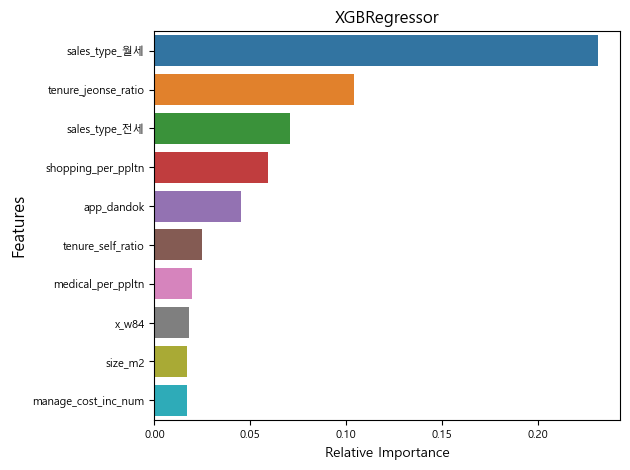

In [3]:
df_oneroom_result = reg.get_model_each_servcie(df_oneroom[:10000])

오피스텔
     Model  Train RMSE  Train R^2  Test RMSE  Test R^2
0  XGBoost    1.356475   0.999366  17.366491  0.890989


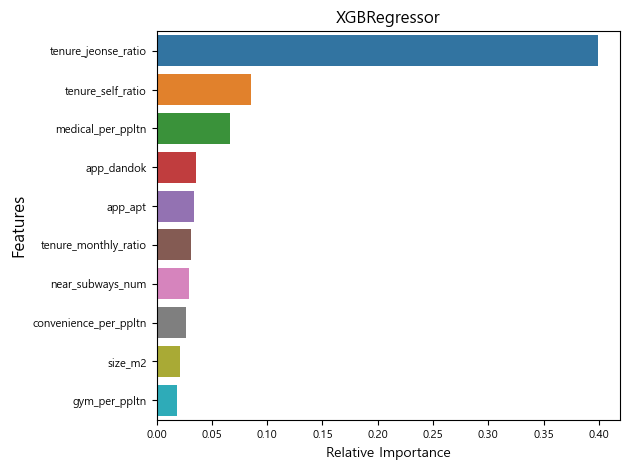

In [4]:
print('오피스텔')
df_officetel_result=reg.get_model_each_servcie(df_officetel)


빌라
     Model  Train RMSE  Train R^2  Test RMSE  Test R^2
0  XGBoost    1.129124   0.999487  22.739038   0.80217


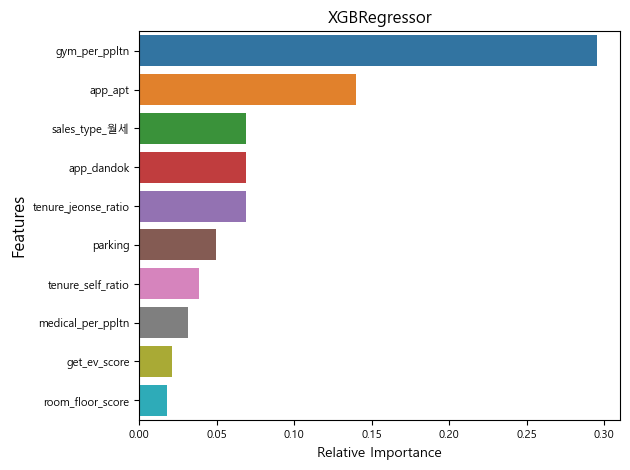

In [5]:
print('빌라')
df_villa_result = reg.get_model_each_servcie(df_villa)


## 3-2. 주거형태 별 회귀분석 결과해석
- 주거형태 중 원룸의 오차는 한자리 수로 개선됨. 
- 그러나 오피스텔, 빌라의 오차는 개선되지 않음. 
- 이는 원룸에 비해 오피스텔, 빌라의 데이터 샘플 수가 적었기 때문이라고 생각.
  - 원룸: 19,013개
  - 오피스텔: 8,259개
  - 빌라: 6,936개


In [6]:
# 주거형태(service_type) 별 데이터 수
df['service_type'].value_counts()

원룸      19013
오피스텔     8259
빌라       6936
Name: service_type, dtype: int64

---
# 4. 회귀분석의 한계점, 느낀점
## 한계점
- XGB 모델의 정확도가 떨어졌던 이유는 데이터의 양이 부족했기 때문
- 주거형태 별로 데이터가 충분했다면 개선 가능했을 것
## 느낀점
    - 
